In [ ]:
!pip install transformers

In [ ]:
!pip install py_vncorenlp

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.2 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4304 sha256=fb9647db5e1990c8f42fe96ce614e6f4a1c43476e300b9e91ab33f0cdd454033
  Stored in directory: /root/.cache/pip/wheels/6d/2d/d6/158260bfd6820d144535857b80cc112bee5c3aa6d81b6dc049
Successfully built py_vncorenlp


In [ ]:
import py_vncorenlp
py_vncorenlp.download_model(save_dir='/content/drive/MyDrive/Colab_Notebooks/deep_learning/vncorenlp')

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModel
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score
from transformers import TFAutoModel
from keras.saving import register_keras_serializable
tokenizer = AutoTokenizer.from_pretrained('vinai/phobert-base')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

In [ ]:
df = pd.read_csv('data.csv')
df.head()
df.info()
print(df.columns)
df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16188 entries, 0 to 16187
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  16188 non-null  object
 1   label    16188 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 253.1+ KB
Index(['comment', 'label'], dtype='object')


,count
label,
2,8042
0,7447
1,699


In [ ]:
df.head(10)

,comment,label
0,slide giáo trình đầy đủ .,2
1,Bạn bè em fan jack nên em ghét trường 👌,0
2,trường không phát người yêu gì cả .,0
3,"Trường tốt không chỉ cơ sở vật chất, đội ngũ g...",2
4,"Trường học rộng rãi thoáng mát, sinh viên thì ...",2
5,Em ghét trường 😡 .,0
6,trường học như ngôi nhà thứ 2 của em 😍,2
7,"Điều hoà hỏng, thích hợp để về chứ học cái gì 🤣 .",0
8,"CHẠY NGAY ĐI, do dự tiền đình mất",0
9,Trường học không có gì đặc biệt.,1


<Axes: xlabel='label', ylabel='count'>

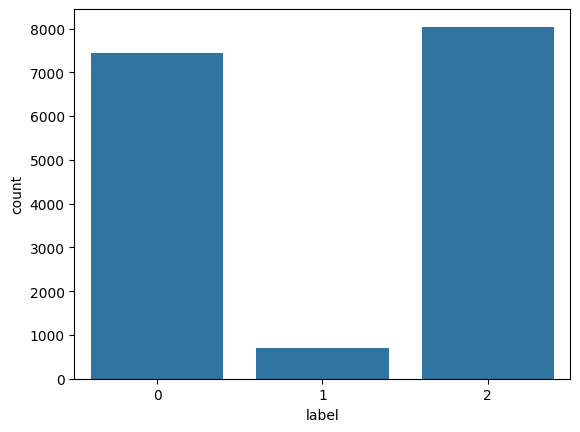

In [ ]:
import seaborn as sns
sns.countplot(x='label', data=df)

<Axes: xlabel='label', ylabel='count'>

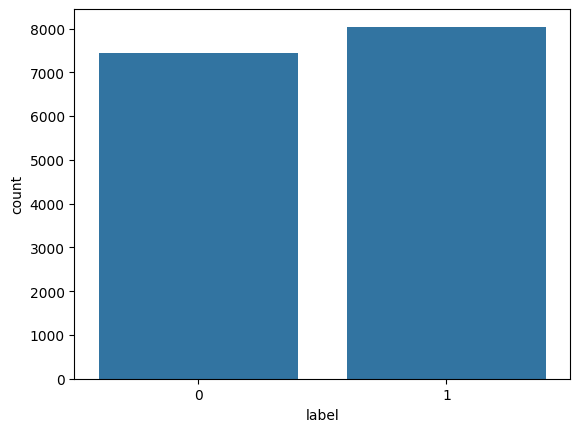

In [ ]:
df = df[df['label'] != 1]
df.loc[df['label'] == 2, 'label'] = 1
df.to_csv('data.csv', index = False)
sns.countplot(x='label', data=df)

In [ ]:
import re
import py_vncorenlp

letters = set('aáàảãạăắằẳẵặâấầẩẫậbcdđeéèẻẽẹêếềểễệfghiíìỉĩịjklmnoóòỏõọôốồổỗộơớờởỡợpqrstuúùủũụưứừửữựvwxyýỳỷỹỵz0123456789. ')

def preprocess_text(text):
    cleaned_text = ''.join(letter.lower() for letter in text if letter.lower() in letters)
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()
    return cleaned_text

def preprocess_csv(file_path, text_column="comment", output_file="processed_data.csv"):
    df = pd.read_csv(file_path)
    df = df.dropna(subset=[text_column])
    df = df[df[text_column].str.strip() != '']
    df = df.reset_index(drop=True)
    df[text_column] = df[text_column].astype(str).apply(preprocess_text)
    df.to_csv(output_file, index=False, encoding='utf-8')
    return df

df = preprocess_csv("data.csv", text_column="comment")

rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content/drive/MyDrive/Colab_Notebooks/deep_learning/vncorenlp')
df['comment'] = df['comment'].astype(str).apply(rdrsegmenter.word_segment)
df.to_csv('/content/drive/MyDrive/Colab_Notebooks/deep_learning/data_new.csv', index=False)
print(df["comment"].head())

                                             comment
0                        [slide giáo_trình đầy_đủ .]
1            [bạn_bè em fan jack nên em ghét_trường]
2              [trường không phát người_yêu gì cả .]
3  [trường tốt không_chỉ cơ_sở vật_chất đội_ngũ g...
4  [trường_học rộng_rãi thoáng mát sinh_viên thì ...


In [ ]:
df.head(10)

,comment,label
0,[slide giáo_trình đầy_đủ .],1
1,[bạn_bè em fan jack nên em ghét_trường],0
2,[trường không phát người_yêu gì cả .],0
3,[trường tốt không_chỉ cơ_sở vật_chất đội_ngũ g...,1
4,[trường_học rộng_rãi thoáng mát sinh_viên thì ...,1
5,[em ghét trường .],0
6,[trường_học như ngôi nhà thứ 2 của em],1
7,[điều_hoà hỏng thích_hợp để về chứ học cái gì .],0
8,[chạy ngay đi do_dự tiền_đình mất],0
9,[chạy đi em ơi],0


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/deep_learning/data_new.csv')
df.head()

,comment,label
0,['slide giáo_trình đầy_đủ .'],1
1,['bạn_bè em fan jack nên em ghét_trường'],0
2,['trường không phát người_yêu gì cả .'],0
3,['trường tốt không_chỉ cơ_sở vật_chất đội_ngũ ...,1
4,['trường_học rộng_rãi thoáng mát sinh_viên thì...,1


In [ ]:
import re
df['comment'] = df['comment'].astype(str).apply(lambda x: re.sub(r"^\[\s*'(.*)'\s*\]$", r"\1", x))

In [ ]:
def generate_training_data(df, ids, masks, tokenizer):
    for i, comment in enumerate(df['comment']):
        tokenizer_comment = tokenizer.encode_plus(
            comment,
            max_length=256,
            truncation=True,
            padding='max_length',
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenizer_comment['input_ids']
        masks[i, :] = tokenizer_comment['attention_mask']
    return ids, masks

In [ ]:
def SentimentDatasetMapFunction(input_ids, attention_mask, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask
    }, labels

In [ ]:
train_size = int(0.8 * len(df))
train_data = df[:train_size]
temp_data = df[train_size:]
temp_size = int(0.5 * len(temp_data))
val_data = temp_data[:temp_size]
test_data = temp_data[temp_size:]

print(f"Train size: {len(train_data)}")
print(f"Validation size: {len(val_data)}")
print(f"Test size: {len(test_data)}")

Train size: 12391
Validation size: 1549
Test size: 1549


In [ ]:
max_length = 256
num_labels = 2
X_train_ids = np.zeros((len(train_data), max_length), dtype=np.int32)
X_train_masks = np.zeros((len(train_data), max_length), dtype=np.int32)
X_train_ids, X_train_masks = generate_training_data(train_data, X_train_ids, X_train_masks, tokenizer)
y_train = np.array(train_data['label'])
y_train_encoded = np.zeros((len(y_train), num_labels), dtype = np.int32)
y_train_encoded[np.arange(len(y_train)), y_train] = 1

X_val_ids = np.zeros((len(val_data), max_length), dtype=np.int32)
X_val_masks = np.zeros((len(val_data), max_length), dtype=np.int32)
X_val_ids, X_val_masks = generate_training_data(val_data, X_val_ids, X_val_masks, tokenizer)
y_val = np.array(val_data['label'])
y_val_encoded = np.zeros((len(y_val), num_labels), dtype = np.int32)
y_val_encoded[np.arange(len(y_val)), y_val] = 1

X_test_ids = np.zeros((len(test_data), max_length), dtype=np.int32)
X_test_masks = np.zeros((len(test_data), max_length), dtype=np.int32)
X_test_ids, X_test_masks = generate_training_data(test_data, X_test_ids, X_test_masks, tokenizer)
y_test = np.array(test_data['label'])
y_test_encoded = np.zeros((len(y_test), num_labels), dtype = np.int32)
y_test_encoded[np.arange(len(y_test)), y_test] = 1

In [ ]:
print(X_train_ids[1])
print(y_train_encoded[1])

[    0  1135   193  1818 27993    77   193  4908  4827  1187 16945     2
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1   

In [ ]:
text = tokenizer.decode(X_train_ids[1], skip_special_tokens= True)
print(text)

bạn_bè em fan jack nên em ghét_trường


In [ ]:
train_data = tf.data.Dataset.from_tensor_slices(SentimentDatasetMapFunction(X_train_ids, X_train_masks, y_train_encoded))
val_data = tf.data.Dataset.from_tensor_slices(SentimentDatasetMapFunction(X_val_ids, X_val_masks, y_val_encoded))
test_data = tf.data.Dataset.from_tensor_slices(SentimentDatasetMapFunction(X_test_ids, X_test_masks, y_test_encoded))

In [ ]:
print(train_data)
print(val_data)
print(test_data)

<_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(256,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(256,), dtype=tf.int32, name=None)}, TensorSpec(shape=(2,), dtype=tf.int32, name=None))>
<_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(256,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(256,), dtype=tf.int32, name=None)}, TensorSpec(shape=(2,), dtype=tf.int32, name=None))>
<_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(256,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(256,), dtype=tf.int32, name=None)}, TensorSpec(shape=(2,), dtype=tf.int32, name=None))>


In [ ]:
batch_size = 64
train_data = train_data.batch(batch_size)
val_data = val_data.batch(batch_size)
test_data = test_data.batch(batch_size)

In [ ]:
@register_keras_serializable(package="CustomLayers")
class PhoBERT(tf.keras.layers.Layer):
    def __init__(self, model_name="vinai/phobert-base", **kwargs):
        super(PhoBERT, self).__init__(**kwargs)
        self.bert = TFAutoModel.from_pretrained(model_name)
        self.bert.trainable = False

    def call(self, inputs):
        input_ids, attention_mask = inputs
        input_ids = tf.cast(input_ids, tf.int32)
        attention_mask = tf.cast(attention_mask, tf.int32)
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask)[0]
        return output[:, 0, :]

    def get_config(self):
        config = super().get_config()
        config.update({"model_name": "vinai/phobert-base"})
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [ ]:
input_ids = Input(shape=(256,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(256,), dtype=tf.int32, name="attention_mask")

bert_output = PhoBERT()([input_ids, attention_mask])

x = Dense(256, activation="relu")(bert_output)
x = Dropout(0.1)(x)
output = Dense(2, activation="softmax")(x)

model = Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pho_bert_1          │ (None, 768)       │          0 │ input_ids[0][0],  │
│ (PhoBERT)           │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │    196,864 │ pho_bert_1[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 2)         │        514 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 197,378 (771.01 KB)

 Trainable params: 197,378 (771.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 15
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 207s 965ms/step - accuracy: 0.6860 - loss: 0.6043 - val_accuracy: 0.8864 - val_loss: 0.3891
Epoch 2/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 181s 894ms/step - accuracy: 0.8805 - loss: 0.3666 - val_accuracy: 0.9019 - val_loss: 0.2942
Epoch 3/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 202s 894ms/step - accuracy: 0.9017 - loss: 0.2868 - val_accuracy: 0.9103 - val_loss: 0.2523
Epoch 4/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 200s 887ms/step - accuracy: 0.9118 - loss: 0.2475 - val_accuracy: 0.9199 - val_loss: 0.2275
Epoch 5/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 202s 886ms/step - accuracy: 0.9209 - loss: 0.2230 - val_accuracy: 0.9277 - val_loss: 0.2107
Epoch 6/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 172s 887ms/step - accuracy: 0.9269 - loss: 0.2067 - val_accuracy: 0.9290 - val_loss: 0.1992
Epoch 7/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 172s 886ms/step - accuracy: 0.9333 - loss: 0.1941 - val_accuracy: 0.9329 - val_loss: 0.1906
Epoch 8/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 202s 887ms/step - accuracy: 0.9364 -

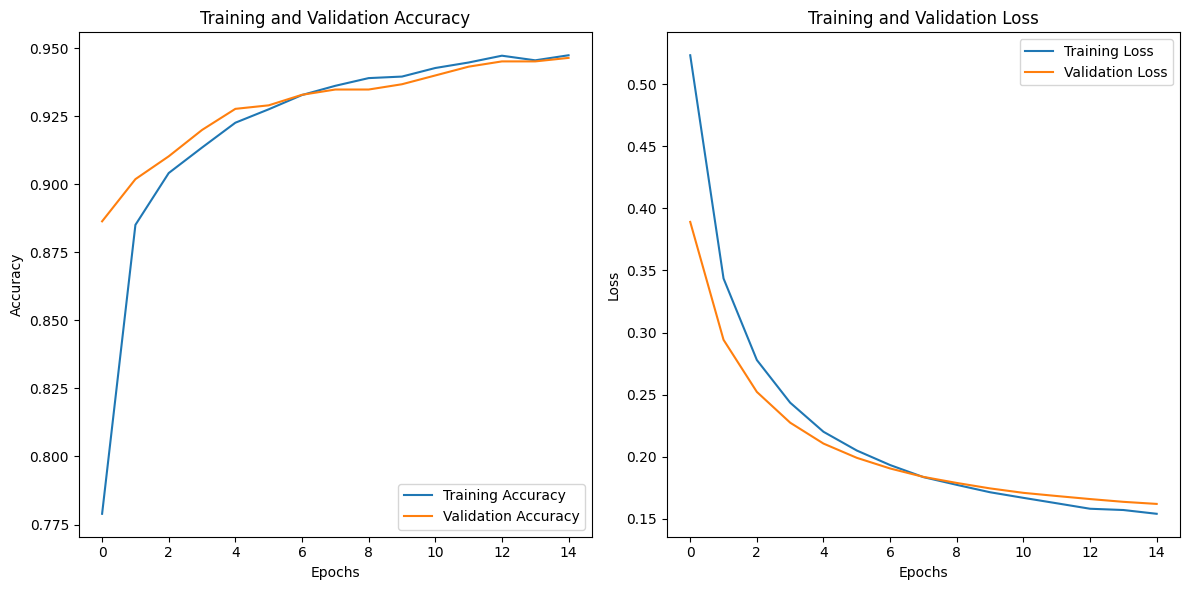

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history.get('val_accuracy', [])
loss = history.history['loss']
val_loss = history.history.get('val_loss', [])

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
if val_acc:
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
if val_loss:
    plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_val_pred_prob = model.predict([X_val_ids, X_val_masks])
y_val_pred = np.argmax(y_val_pred_prob, axis=1)
y_val_true = y_val_encoded.argmax(axis=1)
print(f"---Chỉ số đánh giá trên tập validation---")
accuracy = accuracy_score(y_val_true, y_val_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_val_true, y_val_pred, average='weighted')
recall = recall_score(y_val_true, y_val_pred, average='weighted')
f1 = f1_score(y_val_true, y_val_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 369ms/step
---Chỉ số đánh giá trên tập validation---
Accuracy: 0.9464
Precision: 0.9473
Recall: 0.9464
F1-score: 0.9465


In [ ]:
y_pred_prob = model.predict([X_test_ids, X_test_masks])
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_test_encoded.argmax(axis=1)
print(f"---Chỉ số đánh giá trên tập test---")
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 371ms/step
---Chỉ số đánh giá trên tập test---
Accuracy: 0.9445
Precision: 0.9448
Recall: 0.9445
F1-score: 0.9445


In [ ]:
model.save("sentiment_classification_model.keras", save_format='tf')

In [ ]:
model = load_model(
    "sentiment_classification_model.keras")

tf_model.h5:   0%|          | 0.00/740M [00:00<?, ?B/s]

Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
def prepare_data(input_texts, tokenizer):
    tokenized_data = tokenizer(
        input_texts,
        max_length=256,
        truncation=True,
        padding='max_length',
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(tokenized_data.input_ids, tf.int32),
        'attention_mask': tf.cast(tokenized_data.attention_mask, tf.int32)
    }

In [ ]:
input_texts = ["trường học rộng rãi thoáng mát, lớp học đầy đủ cơ sở vật chất",
               "em yêu trường lắm luôn 😊",
               "trường học phí đã rẻ rồi lại còn có chất lượng giảng dạy tốt",
               "Mạng của trường chán quá",
               "web trường thì chậm nhưng thu học phí thì nhanh",
               "Trường 10 điểm không có nhưng",
               "Tổ chức nhiều hoạt động thú vị cho sinh viên",
               "Cứ phải gọi là không có chỗ chê",
	             "10 điểm tuyệt vời lắm",
	             "Thầy cô bạn bè dễ thương dễ mến",
	             "Đường xá to đẹp rộng rãi thoáng mát",
	             "Tổ đội clb 10 điểm",
	             "Lịch học ít nghỉ nhiều",
	             "Học phí cao",
	             "vệ sinh bẩn",
	             "Phòng đào tạo khó khăn với sinh viên"]
for i,text in enumerate(input_texts):
    print(f"comment {i+1} : {text}")

comment 1 : trường học rộng rãi thoáng mát, lớp học đầy đủ cơ sở vật chất
comment 2 : em yêu trường lắm luôn 😊
comment 3 : trường học phí đã rẻ rồi lại còn có chất lượng giảng dạy tốt
comment 4 : Mạng của trường chán quá
comment 5 : web trường thì chậm nhưng thu học phí thì nhanh
comment 6 : Trường 10 điểm không có nhưng
comment 7 : Tổ chức nhiều hoạt động thú vị cho sinh viên
comment 8 : Cứ phải gọi là không có chỗ chê
comment 9 : 10 điểm tuyệt vời lắm
comment 10 : Thầy cô bạn bè dễ thương dễ mến
comment 11 : Đường xá to đẹp rộng rãi thoáng mát
comment 12 : Tổ đội clb 10 điểm
comment 13 : Lịch học ít nghỉ nhiều
comment 14 : Học phí cao
comment 15 : vệ sinh bẩn
comment 16 : Phòng đào tạo khó khăn với sinh viên


In [ ]:
import re
letters = set('aáàảãạăắằẳẵặâấầẩẫậbcdđeéèẻẽẹêếềểễệfghiíìỉĩịjklmnoóòỏõọôốồổỗộơớờởỡợpqrstuúùủũụưứừửữựvwxyýỳỷỹỵz0123456789. ')

def preprocess_text(text):
    cleaned_text = ''.join(letter.lower() for letter in text if letter.lower() in letters)
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()
    return cleaned_text

input_texts = [preprocess_text(text) for text in input_texts]
print(input_texts)

['trường học rộng rãi thoáng mát lớp học đầy đủ cơ sở vật chất', 'em yêu trường lắm luôn', 'trường học phí đã rẻ rồi lại còn có chất lượng giảng dạy tốt', 'mạng của trường chán quá', 'web trường thì chậm nhưng thu học phí thì nhanh', 'trường 10 điểm không có nhưng', 'tổ chức nhiều hoạt động thú vị cho sinh viên', 'cứ phải gọi là không có chỗ chê', '10 điểm tuyệt vời lắm', 'thầy cô bạn bè dễ thương dễ mến', 'đường xá to đẹp rộng rãi thoáng mát', 'tổ đội clb 10 điểm', 'lịch học ít nghỉ nhiều', 'học phí cao', 'vệ sinh bẩn', 'phòng đào tạo khó khăn với sinh viên']


In [ ]:
import py_vncorenlp
rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content/drive/MyDrive/Colab_Notebooks/deep_learning/vncorenlp')
segment_texts = [rdrsegmenter.word_segment(text) for text in input_texts]
text = [' '.join(segmented_text) for segmented_text in segment_texts]
text = '\n'.join(text)
print(text)

trường_học rộng_rãi thoáng mát lớp_học đầy_đủ cơ_sở vật_chất
em yêu trường lắm luôn
trường_học phí đã rẻ rồi lại còn có chất_lượng giảng_dạy tốt
mạng của trường chán quá
web trường thì chậm nhưng thu học_phí thì nhanh
trường 10 điểm không có nhưng
tổ_chức nhiều hoạt_động thú_vị cho sinh_viên
cứ phải gọi là không có chỗ chê
10 điểm tuyệt_vời lắm
thầy_cô bạn_bè dễ_thương dễ mến
đường xá to đẹp rộng_rãi thoáng mát
tổ đội clb 10 điểm
lịch học ít nghỉ nhiều
học_phí cao
vệ_sinh bẩn
phòng đào_tạo khó_khăn với sinh_viên


In [ ]:
tokenizer_input_text = prepare_data(input_texts, tokenizer)

In [ ]:
import time
start_time = time.time()
predictions = model.predict(tokenizer_input_text)
predict_label = np.argmax(predictions, axis = 1)
end_time = time.time()
print(f"Thời gian dự đoán: {end_time - start_time} giây")
for i in range(len(predictions)):
    print(f"comment {i+1}:")
    print(f"Dự đoán: {predictions[i]}")
    print(f"Nhãn dự đoán: {predict_label[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
Thời gian dự đoán: 0.35538554191589355 giây
comment 1:
Dự đoán: [0.4098243 0.5901756]
Nhãn dự đoán: 1
comment 2:
Dự đoán: [0.03547423 0.96452576]
Nhãn dự đoán: 1
comment 3:
Dự đoán: [0.14231016 0.85768986]
Nhãn dự đoán: 1
comment 4:
Dự đoán: [0.9765385  0.02346156]
Nhãn dự đoán: 0
comment 5:
Dự đoán: [0.9729897  0.02701028]
Nhãn dự đoán: 0
comment 6:
Dự đoán: [0.7900662 0.2099338]
Nhãn dự đoán: 0
comment 7:
Dự đoán: [0.66932476 0.33067518]
Nhãn dự đoán: 0
comment 8:
Dự đoán: [0.99773324 0.00226673]
Nhãn dự đoán: 0
comment 9:
Dự đoán: [0.4256231 0.5743769]
Nhãn dự đoán: 1
comment 10:
Dự đoán: [0.1714185 0.8285815]
Nhãn dự đoán: 1
comment 11:
Dự đoán: [0.2719242  0.72807586]
Nhãn dự đoán: 1
comment 12:
Dự đoán: [0.37621534 0.62378466]
Nhãn dự đoán: 1
comment 13:
Dự đoán: [0.8583759  0.14162408]
Nhãn dự đoán: 0
comment 14:
Dự đoán: [0.6879456 0.3120544]
Nhãn dự đoán: 0
comment 15:
Dự đoán: [0.51973706 0.4802629 ]
Nhãn dự đoán: 0
comment 16:
Dự đoán: 